# **Image Convultion**

## **Team Members**

```text
ADARSH LIJU ABRAHAM (PES2UG20CS017)
ANANYA ADIGA (PES2UG20CS043)
AMEY MITTAL (PES2UG20CS037)
ABHISHEK S KUTRE (PES2UG20CS012)
```

# **Abstract** 
- Image convolution is an important image processing technique where two signals(images) are combined to form a third signal mathematically.  Here we deal with images using a linear
- Invariant system (LTI system) where an image is the input and the output is always linear
- In simple, an image convolved with mask ,where mask is a signal represented by a two dimensional matrix. You start with a kernel ,which is a small matrix of weights. This kernel slides over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel.
- We use image convolution as it overcomes the other two methods of manipulating images by sharpening, blurring, edge detection and noise reduction.


# **Libraries Used**

1. `numpy` - NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

2. `matplotlib` - Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits.

3. `cv2` - OpenCV is a library of programming functions mainly aimed at real-time computer vision.

In [ ]:
# Image processing via convolution
# Importing needed library
import numpy as np
import matplotlib.pyplot as plt
import cv2 #to identify the image (opencv version 2)
from google.colab.patches import cv2_imshow # showing the image output

# **Resizing an Image**

Resizing an image means changing the dimensions of it, be it width alone, height alone or changing both of them. Also, the aspect ratio of the original image could be preserved in the resized image. To resize an image, OpenCV provides `cv2.resize()` function.

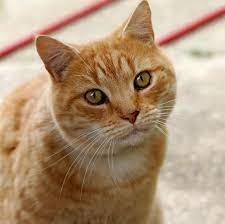

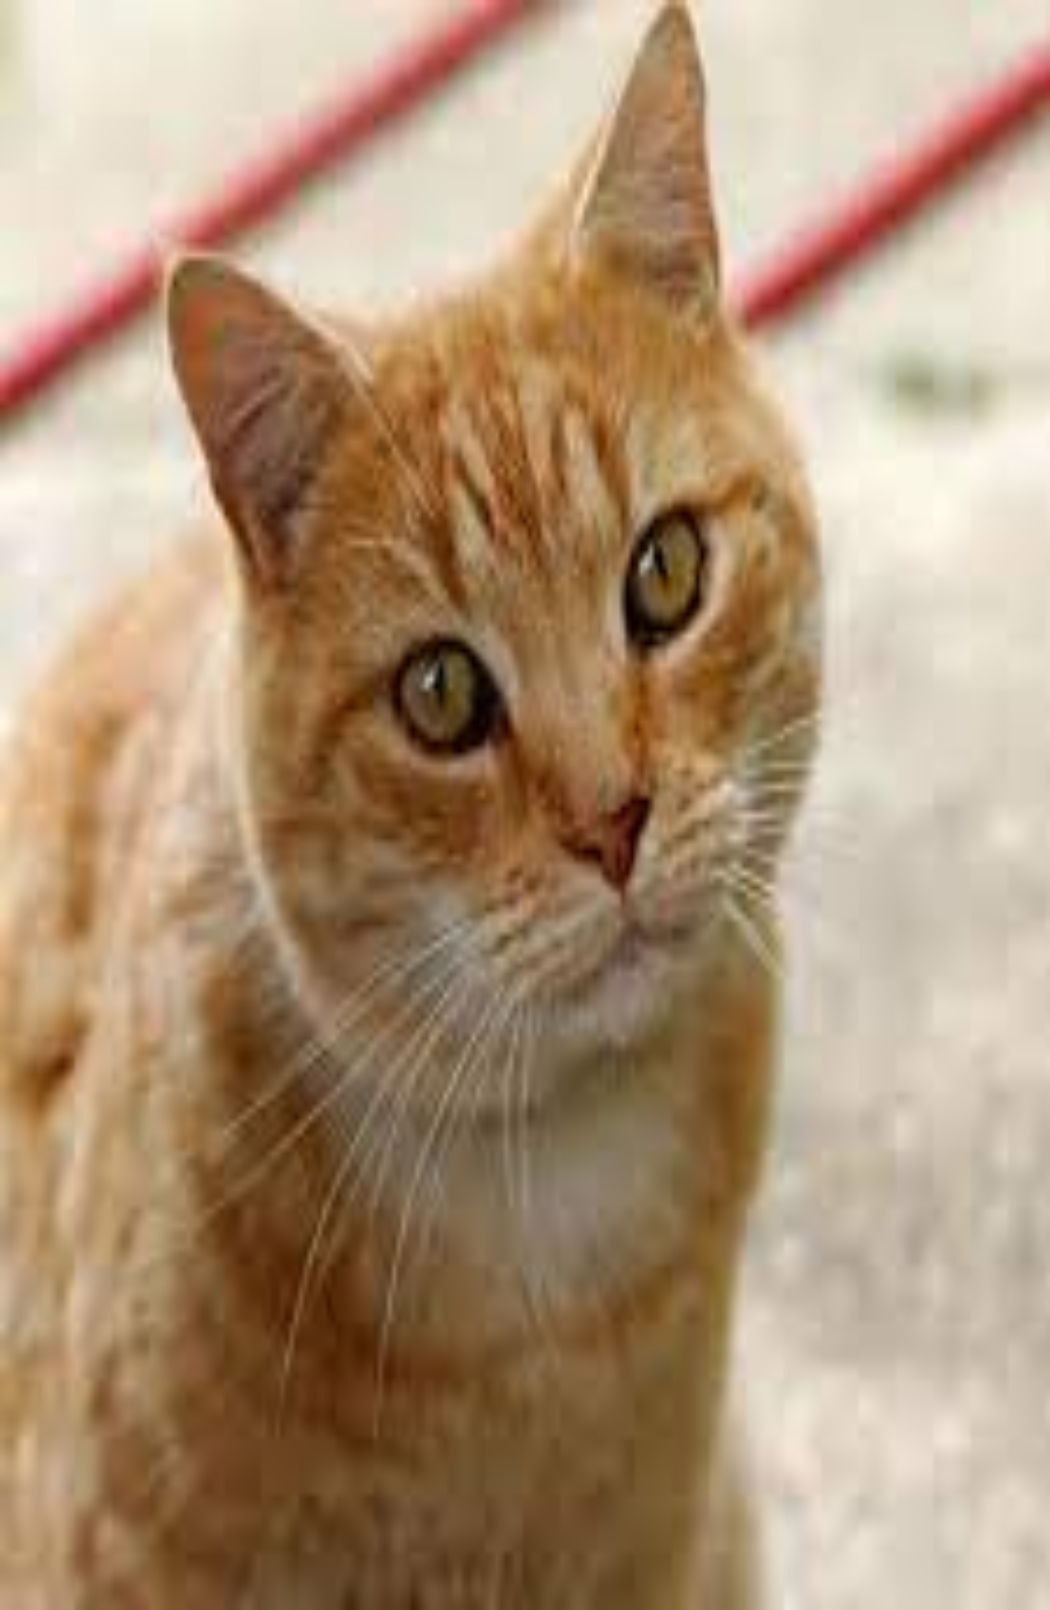

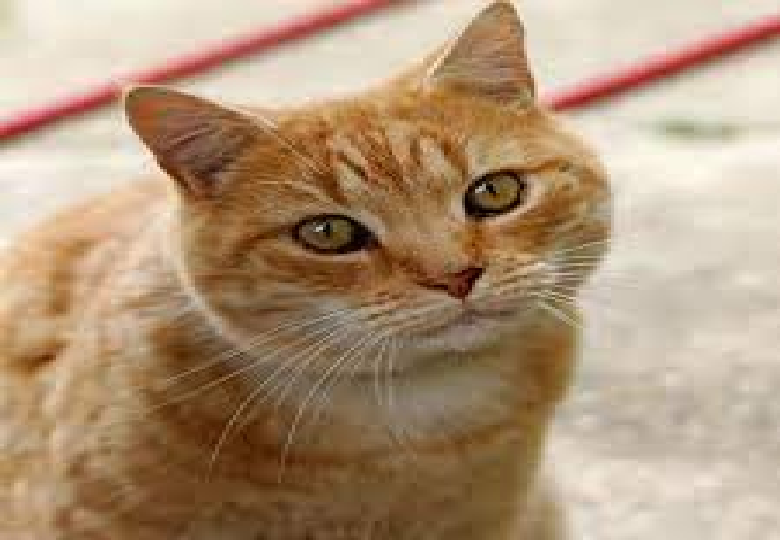

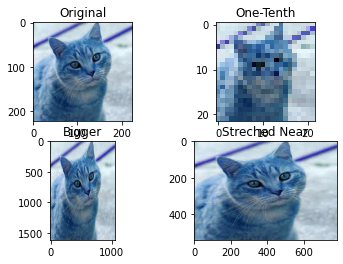

In [ ]:

# Reading images
cat= cv2.imread('cat.jpg')

one_tenth = cv2.resize(cat, (0, 0), fx = 0.1, fy = 0.1)  #f(x)=horizontal axis , fy=vertical axis #cat-source  
bigger = cv2.resize(cat, (1050, 1610))
 
stretch_near = cv2.resize(cat, (780, 540),
               interpolation = cv2.INTER_NEAREST) #Image interpolation occurs when you resize or distort your image from one pixel grid to another.
 # a nearest neighbour interpolation
 
 
Titles =["Original", "One-Tenth", "Bigger", "Streched Near"]  #for the graph
images =[cat, one_tenth, bigger, stretch_near]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)  # the picture has 2 rows,2 columns and is in the "i+1"th position
    plt.title(Titles[i])
    plt.imshow(images[i])
cv2_imshow(cat)
print("\n")
cv2_imshow(one_tenth)
print("\n")
cv2_imshow(bigger)
print("\n")
cv2_imshow(stretch_near)
print("\n")
plt.show()

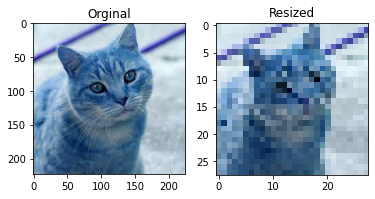

In [ ]:
FILE_NAME = 'cat.jpg'

# Read image from disk.
img = cv2.imread(FILE_NAME)

# Get number of pixel horizontally and vertically.
(height, width) = img.shape[:2]

# Specify the size of image along with interploation methods.
# cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC
# is used for zooming.
res = cv2.resize(img, (int(width / 8), int(height / 8)), interpolation = cv2.INTER_CUBIC)

# Write image back to disk.
cv2.imwrite('cat_resized.jpg', res) #res=image that u wanna save , function returns True if image succes

# Plot the images.
Titles =["Orginal", "Resized"]
images =[img, res]
count = 2
 
for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
cv2_imshow(res)
print("\n")
plt.show()

# **Rotating an Image**

## Steps to Rotate an Image
1. First, you need to get the center of rotation. This typically is the center of the image you are trying to rotate.
2. Next, create the 2D-rotation matrix. OpenCV provides the `getRotationMatrix2D()` function that we discussed above. 
3. Finally, apply the affine transformation to the image, using the rotation matrix you created in the previous step. The `warpAffine()` function in OpenCV does the job.
4. The `warpAffine()` function applies an affine transformation to the image. After applying affine transformation, all the parallel lines in the original image will remain parallel in the output image as well

#### `getRotationMatrix2D()`

### Syntax

```python
cv2.getRotationMatrix2D(center, angle, scale)
```


The `getRotationMatrix2D()` function takes the following arguments:

- center: the center of rotation for the input image
- angle: the angle of rotation in degrees
- scale: an isotropic scale factor which scales the image up or down according to the value provided

#### `warpAffine()`

### Syntax

```python
warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
```
The `warpAffline()` function takes the following arguments:

  * src: the source mage
  * M: the transformation matrix
  * dsize: size of the output image
  * dst: the output image
  * flags: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
  * borderMode: the pixel extrapolation method
  * borderValue: the value to be used in case of a constant border, has a default value of 0




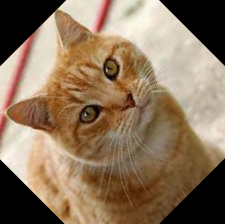

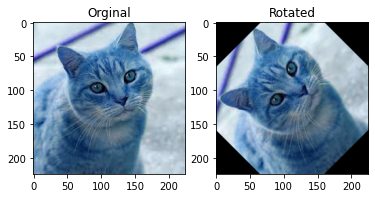

In [ ]:
# Read image from the disk.
img = cv2.imread(FILE_NAME)

# Shape of image in terms of pixels.
(rows, cols) = img.shape[:2]

# getRotationMatrix2D creates a matrix needed for transformation.
# We want matrix for rotation w.r.t center to 45 degree without scaling.
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
# angle-angle of rotation(positive if anticlockwise,negative if clockwise), 
# scaling factor- to scale the image
res = cv2.warpAffine(img, M, (cols, rows))

# Write image back to disk.
cv2.imwrite('cat_rotated.jpg', res)

# Plot the images.
Titles =["Orginal", "Rotated"]
images =[img, res]
count = 2
 
for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
cv2_imshow(res)
plt.show()

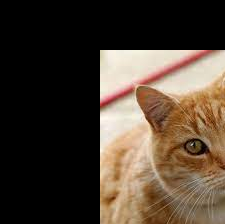

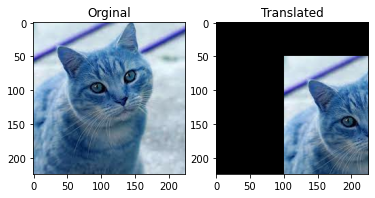

In [ ]:
# Create translation matrix.
# If the shift is (x, y) then matrix would be where x=distance from x - axis , y= distance from y-axis
# M = [1 0 x]
#     [0 1 y]
# Let's shift by (100, 50).
M = np.float32([[1, 0, 100], [0, 1, 50]])

(rows, cols) = img.shape[:2]

# warpAffine does appropriate shifting given the
# translation matrix.
res = cv2.warpAffine(img, M, (cols, rows))
#  parameters-> img-input image, M- transformation matrix, size of the output image


# Write image back to disk.
cv2.imwrite('result.jpg', res)

# Plot the images.
Titles =["Orginal", "Translated"]
images =[img, res]
count = 2
 
for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
cv2_imshow(res)
plt.show()

# **Canny Edge Detection**

The process of Canny edge detection algorithm can be broken down to five different steps:
1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply gradient magnitude thresholding or lower bound cut-off suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.


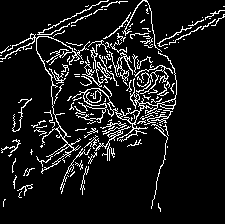

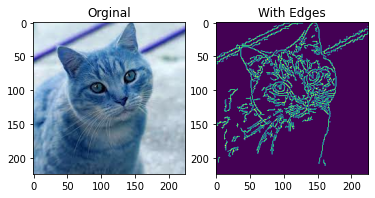

In [ ]:
# Canny edge detection. # to reduce amount of data to be processed
#Canny does use two thresholds (upper and lower): If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge.
#  If a pixel gradient value is below the lower threshold, then it is rejected.
# canny produces smoother edges
edges = cv2.Canny(img, 100, 200)  #parameters- input image, lower threshold value for hysterisis thresholding, 
# upper threshold values

# Write image back to disk.
cv2.imwrite('cat_edges.jpg', edges)
# Plot the images.
Titles =["Orginal", "With Edges"]
images =[img, edges]
count = 2
 
for i in range(count):
    plt.subplot(1, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
cv2_imshow(edges)
plt.show()

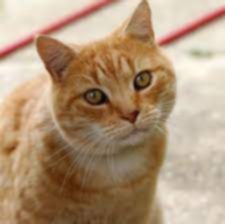

In [ ]:
# Gaussian Blur - to remove noise, smoothning the image, lower intensity
# Gaussian Blurring:Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software,
#  typically to reduce image noise and reduce detail.
#  It is also used as a preprocessing stage before applying our machine learning or deep learning models.
Gaussian = cv2.GaussianBlur(img, (5, 5), 1) #parameters- source,size of kernel,standard deviation
cv2_imshow(Gaussian)


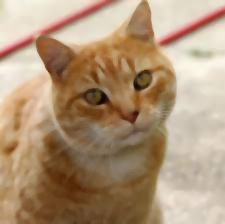

In [ ]:
# Median Blur-central element is replaced by median of all pixels in the kernel area
# Median Blur: The Median Filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Median filtering is very widely used in digital image processing because,
#  under certain conditions, it preserves edges while removing noise. 
#  It is one of the best algorithms to remove Salt and pepper noise.
median = cv2.medianBlur(img, 5) #source and kernel size
cv2_imshow(median)

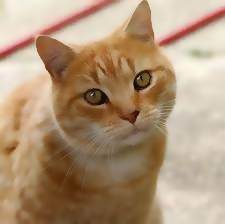

In [ ]:
# Bilateral Blur 
# Bilateral Blur: A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. 
# This weight can be based on a Gaussian distribution. Thus, sharp edges are preserved while discarding the weak ones.
bilateral = cv2.bilateralFilter(img, 9, 75, 75) #src,diameter of pixel,filter sigma in color space, filter sigma in coordinate space
cv2_imshow(bilateral)

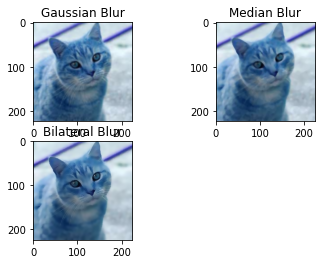

In [ ]:
Titles =["Gaussian Blur", "Median Blur","Bilateral Blur"]
images =[Gaussian,median,bilateral]
count = 3
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
plt.show()